In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import geopandas as gpd
from shapely.geometry import Point
import xarray as xr
from pathlib import Path
from shapely import wkt
from shapely.geometry import Polygon
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
import math


<Axes: >

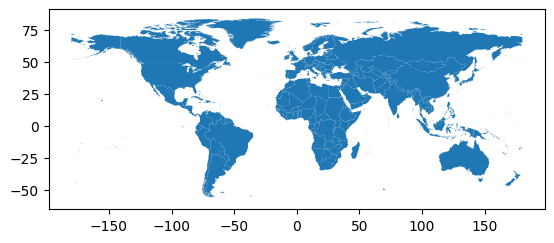

In [99]:
gdf = gpd.read_file(r"E:\projet m2\DM\projet\Country\Country\Country.shp")
gdf.plot()

<Axes: >

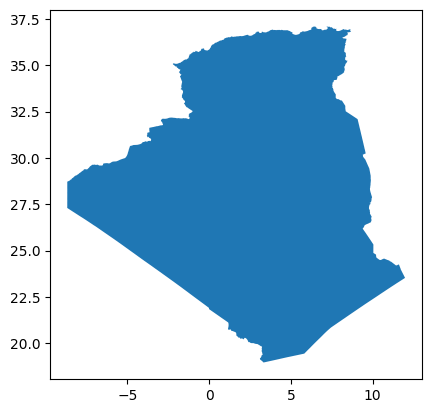

In [10]:
algeria_geom = gdf[gdf['CNTRY_NAME'] == 'Algeria']
algeria_geom.to_file(r"E:\projet m2\DM\projet\Country\Country\algeria_shapefile.shp")
algeria_geom.plot()

In [ ]:
data_dir = Path("C:/Users/PC/Downloads/Climate-DATA/Climate-DATA")

# Variables climatiques
variables = ['Psurf', 'Qair', 'Snowf', 'tair', 'Wind', 'Rainf']

# 2. Filtrer et exporter les données pour chaque variable
for variable in variables:
    algeria_data = []  # Liste pour stocker les données mensuelles pour chaque variable
    
    # Récupérer tous les fichiers de la variable actuelle (un pour chaque mois)
    files = sorted(data_dir.glob(f"{variable}_WFDE5_CRU_*.nc"))
    
    for file in files:
        # Charger le fichier NetCDF
        data = xr.open_dataset(file)
        
        # Définir les coordonnées de projection pour l'alignement géographique
        data = data.rio.write_crs("EPSG:4326")  # En supposant que les données sont en WGS84
        
        # Appliquer le masque de l'Algérie
        data = data.rio.clip([algeria_geom], data.rio.crs, drop=True)
        
        # Convertir en DataFrame et ajouter le mois
        df = data.to_dataframe().reset_index()
        
        # Filtrer les points pour garder uniquement ceux qui sont à l'intérieur des frontières de l'Algérie
        df['geometry'] = df.apply(lambda row: Point(row['lon'], row['lat']), axis=1)
        df = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:4326")
        df = df[df.geometry.within(algeria_geom)]
        
        # Ajouter les données filtrées à la liste pour cette variable
        algeria_data.append(df.drop(columns='geometry'))  # Retirer la colonne geometry pour la sauvegarde en CSV
    
    # 3. Concatenation des données mensuelles en un DataFrame et exportation en CSV
    algeria_data_df = pd.concat(algeria_data, ignore_index=True)
    algeria_data_df.to_csv(f'Algeria_{variable}.csv', index=False)

In [2]:
df = pd.read_csv(r'C:\Users\PC\Desktop\TPS\Data Mining\PROJET\PART 32\Algeria_Psurf.csv')
df_2 = pd.read_csv(r'C:\Users\PC\Desktop\TPS\Data Mining\PROJET\PART 32\Algeria_Qair.csv')
df_3 = pd.read_csv(r'C:\Users\PC\Desktop\TPS\Data Mining\PROJET\PART 32\Algeria_Rainf.csv')
df_4 = pd.read_csv(r'C:\Users\PC\Desktop\TPS\Data Mining\PROJET\PART 32\Algeria_Snowf.csv')
df_5 = pd.read_csv(r'C:\Users\PC\Desktop\TPS\Data Mining\PROJET\PART 32\Algeria_tair.csv')
df_6 = pd.read_csv(r'C:\Users\PC\Desktop\TPS\Data Mining\PROJET\PART 32\Algeria_Wind.csv')
df['Qair'] = df_2['Qair']
df['Rainf'] = df_3['Rainf']
df['Snowf'] = df_4['Snowf']
df['Tair'] = df_5['Tair']
df['Wind'] = df_6['Wind']
df.to_csv('alldata.csv', index=False)

In [7]:
df = pd.read_csv(r'alldata.csv')
df

,time,lon,lat,spatial_ref,PSurf,Qair,Rainf,Snowf,Tair,Wind
0,2019-01-01 00:00:00,-8.25,27.25,0,97571.030,0.004298,0.0,0.0,284.20718,5.317306
1,2019-01-01 00:00:00,-8.25,27.75,0,97514.900,0.004248,0.0,0.0,283.71622,4.761890
2,2019-01-01 00:00:00,-8.25,28.25,0,96978.110,0.004037,0.0,0.0,283.15552,4.482871
3,2019-01-01 00:00:00,-8.25,28.75,0,97654.305,0.003722,0.0,0.0,282.77365,3.294894
4,2019-01-01 00:00:00,-7.75,27.25,0,98167.050,0.004333,0.0,0.0,284.37424,5.316897
...,...,...,...,...,...,...,...,...,...,...
7498555,2019-12-31 23:00:00,10.75,24.25,0,91265.710,0.002460,0.0,0.0,274.82602,5.960714
7498556,2019-12-31 23:00:00,11.25,23.25,0,90972.940,0.002407,0.0,0.0,276.36612,7.024976
7498557,2019-12-31 23:00:00,11.25,23.75,0,91923.170,0.002662,0.0,0.0,276.71426,6.048385
7498558,2019-12-31 23:00:00,11.25,24.25,0,93056.720,0.002721,0.0,0.0,276.61554,5.725703


In [5]:
soil_data = pd.read_csv(r"soil_dz_allprops.csv")
soil_data

,sand % topsoil,sand % subsoil,silt % topsoil,silt% subsoil,clay % topsoil,clay % subsoil,pH water topsoil,pH water subsoil,OC % topsoil,OC % subsoil,...,CEC subsoil,CEC clay topsoil,CEC Clay subsoil,CaCO3 % topsoil,CaCO3 % subsoil,BD topsoil,BD subsoil,C/N topsoil,C/N subsoil,geometry
0,49.570,43.090,28.200,24.200,22.230,32.710,5.860,5.390,2.4110,0.7420,...,12.420,21.50,35.8,0.030,0.090,1.780,1.780,20.8,12.10,"POLYGON ((5.488269805908203 36.69034957885742,..."
1,56.970,55.060,21.440,19.190,21.690,25.680,5.920,6.020,1.0460,0.5500,...,17.380,66.50,61.4,0.760,0.830,1.190,1.320,9.7,8.00,"POLYGON ((7.277111053466797 37.02900695800781,..."
2,57.390,55.210,24.315,22.825,18.295,21.965,6.270,5.750,1.2295,0.3905,...,8.325,20.45,26.1,0.035,0.035,1.690,1.690,18.7,13.00,POLYGON ((7.367879867553711 36.955509185791016...
3,20.410,24.080,32.930,29.190,46.620,46.690,7.860,8.030,0.6790,0.3820,...,37.910,74.20,71.0,6.330,6.770,1.540,1.580,9.3,9.60,"POLYGON ((7.681180000305176 36.97943878173828,..."
4,31.420,28.460,21.650,20.520,46.890,50.950,7.320,7.490,0.6190,0.4240,...,36.980,72.10,69.8,1.950,2.720,1.540,1.670,9.0,8.70,"POLYGON ((8.664039611816406 36.89445877075195,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,32.208,32.934,17.523,18.216,16.335,14.817,4.620,4.719,0.5907,0.4752,...,6.468,34.98,23.1,1.320,0.693,0.726,0.792,6.6,4.95,POLYGON ((3.2276499271392822 19.95354080200195...
291,49.200,42.400,26.000,27.900,24.800,29.300,7.700,7.800,0.3300,0.2300,...,7.900,66.00,50.0,13.100,22.100,1.500,1.400,8.0,11.00,"POLYGON ((5.541150093078613 19.48434066772461,..."
292,23.305,20.080,13.000,13.860,13.695,15.880,3.835,3.880,0.2035,0.1300,...,5.610,33.75,26.2,6.060,10.280,0.760,0.720,5.0,5.25,"POLYGON ((5.961190223693848 19.71068000793457,..."
293,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0000,0.0000,...,0.000,0.00,0.0,0.000,0.000,0.000,0.000,0.0,0.00,POLYGON ((4.107329845428467 19.135799407958984...


# PART 1

In [13]:
def central_tendency(df,attrs):
    mean = df[attrs].mean()
    median = df[attrs].median()
    mode = df[attrs].mode()
    symetric = False
    if mean == median and median == mode:
        symetric = True
    return mean , median , mode , symetric

In [ ]:
def quantiles(df , attr):
    quantiles = np.quantile(df[attr], [0, 0.25, 0.5, 0.75, 1.0])
    IQR = quantiles[3] - quantiles[0]
    lower_bound = quantiles[0] - 1.5 * IQR
    upper_bound = quantiles[3] + 1.5 * IQR

    outliers = df[(df[attr] < lower_bound) | (df[attr] > upper_bound)]

    return quantiles , outliers[attr]

outliers :  Series([], Name: sand % topsoil, dtype: float64)


(array([ 0.  ,  0.  , 36.09, 50.39, 96.  ]),
 Series([], Name: sand % topsoil, dtype: float64))

In [ ]:
def missing_unique(df , attr):
    total_missing_values = df[attr].isnull().sum()
    unique = df[attr].unique()
    return total_missing_values , unique

In [16]:
def box_plots(df , Attr):
    plt.boxplot(df[Attr])
    plt.title(f"Boxplot of {Attr}")
    plt.ylabel("Values")
    plt.show()

In [ ]:
def histogram(df , attr):
    plt.hist(df[attr], bins=10, color='skyblue', edgecolor='black')
    plt.title("Histogram of "+ attr)
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

In [18]:
def scatter(df , attr1 , attr2):
    sns.scatterplot(data = df ,x=attr1, y=attr2, color='skyblue', edgecolor='black')
    plt.show()

In [19]:
def correlation(df , cols):
    correlation_matrix = df[cols].corr()
    sns.heatmap(correlation_matrix, annot=True)
    plt.title("correlation")
    plt.show()

# PART 2

In [ ]:
df['times'] = pd.to_datetime(df['time'])
def get_season(date):
    month = date.month
    
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'
    
season = []
for day in df['times']:
    season.append(get_season(day))  
df['time'] = season
df = df.drop(columns=['times'])
result = df.groupby(['time', 'lon', 'lat'])[['spatial_ref', 'PSurf', 'Qair', 'Rainf', 'Snowf', 'Tair', 'Wind']].agg('mean').reset_index()
result.to_csv('result.csv', index=False)

In [6]:
result = pd.read_csv(r"E:\projet m2\DM\projet\karim\result.csv")
result

,time,lon,lat,spatial_ref,PSurf,Qair,Rainf,Snowf,Tair,Wind
0,Autumn,-8.25,27.25,0.0,96395.803995,0.005245,0.000003,0.000000e+00,296.986281,4.181661
1,Autumn,-8.25,27.75,0.0,96290.093549,0.005160,0.000003,0.000000e+00,296.786269,4.275721
2,Autumn,-8.25,28.25,0.0,95736.574280,0.004982,0.000003,0.000000e+00,296.219228,4.159778
3,Autumn,-8.25,28.75,0.0,96331.354698,0.004588,0.000003,0.000000e+00,295.852178,3.266726
4,Autumn,-7.75,27.25,0.0,96943.307690,0.005196,0.000003,0.000000e+00,297.386269,3.944144
...,...,...,...,...,...,...,...,...,...,...
3419,Winter,10.75,24.25,0.0,91026.635405,0.002916,0.000002,9.076693e-08,286.093315,3.705299
3420,Winter,11.25,23.25,0.0,90811.879694,0.003062,0.000002,6.123483e-08,286.193315,4.360380
3421,Winter,11.25,23.75,0.0,91702.624637,0.003231,0.000002,4.595445e-08,286.558890,3.447045
3422,Winter,11.25,24.25,0.0,92777.330174,0.003248,0.000002,5.344159e-08,286.693319,3.265947


In [12]:
df_pivot = result.pivot_table(index=["lon", "lat"], columns="time", values=['spatial_ref', 'PSurf', 'Qair', 'Rainf', 'Snowf', 'Tair', 'Wind']).reset_index()
df_pivot.columns = ["_".join(col).strip("_") for col in df_pivot.columns]
df_pivot

,lon,lat,PSurf_Autumn,PSurf_Spring,PSurf_Summer,PSurf_Winter,Qair_Autumn,Qair_Spring,Qair_Summer,Qair_Winter,...,Tair_Summer,Tair_Winter,Wind_Autumn,Wind_Spring,Wind_Summer,Wind_Winter,spatial_ref_Autumn,spatial_ref_Spring,spatial_ref_Summer,spatial_ref_Winter
0,-8.25,27.25,96395.803995,96220.120212,96089.167235,96951.465867,0.005245,0.004590,0.006673,0.004074,...,303.635865,288.727783,4.181661,4.901963,5.482650,4.284485,0.0,0.0,0.0,0.0
1,-8.25,27.75,96290.093549,96105.711147,95972.972921,96852.187068,0.005160,0.004534,0.006652,0.004016,...,303.203258,288.696665,4.275721,4.985942,5.514914,4.187331,0.0,0.0,0.0,0.0
2,-8.25,28.25,95736.574280,95542.244065,95417.032283,96283.453891,0.004982,0.004288,0.006406,0.003795,...,302.436955,288.265554,4.159778,4.868591,5.231981,4.000377,0.0,0.0,0.0,0.0
3,-8.25,28.75,96331.354698,96131.631327,95971.124757,96908.782194,0.004588,0.003775,0.005525,0.003525,...,301.736959,288.099987,3.266726,3.903277,4.127035,3.091899,0.0,0.0,0.0,0.0
4,-7.75,27.25,96943.307690,96762.341910,96602.810803,97523.999923,0.005196,0.004342,0.006224,0.004074,...,304.335861,288.793326,3.944144,4.666071,5.100420,4.081393,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851,10.75,24.25,90751.482208,90615.197607,90625.220952,91026.635405,0.005233,0.003629,0.005404,0.002916,...,303.744561,286.093315,3.568983,4.454516,3.587301,3.705299,0.0,0.0,0.0,0.0
852,11.25,23.25,90534.192505,90411.705258,90409.952279,90811.879694,0.005266,0.003620,0.005726,0.003062,...,303.477157,286.193315,4.261529,4.792338,4.490359,4.360380,0.0,0.0,0.0,0.0
853,11.25,23.75,91384.556849,91257.322436,91242.905299,91702.624637,0.005509,0.003825,0.005807,0.003231,...,303.977159,286.558890,3.489293,4.132356,3.641869,3.447045,0.0,0.0,0.0,0.0
854,11.25,24.25,92422.336910,92288.014140,92254.727762,92777.330174,0.005567,0.003816,0.005626,0.003248,...,304.277177,286.693319,3.240399,4.005671,3.356281,3.265947,0.0,0.0,0.0,0.0


In [ ]:
gdf_points = gpd.GeoDataFrame(
    result, 
    geometry=gpd.points_from_xy(result.lon, result.lat),
    crs="EPSG:4326"
)
soil_data['geometry'] = soil_data['geometry'].apply(wkt.loads)

gdf_polygons = gpd.GeoDataFrame(soil_data, geometry='geometry', crs="EPSG:4326")
climat = gpd.sjoin(gdf_points, gdf_polygons, how="inner", predicate="within")
climat.to_csv('climat.csv', index=False)

In [16]:
climat = pd.read_csv(r"E:\projet m2\DM\projet\karim\climat.csv")
climat

,time,lon,lat,spatial_ref,PSurf,Qair,Rainf,Snowf,Tair,Wind,...,CEC topsoil,CEC subsoil,CEC clay topsoil,CEC Clay subsoil,CaCO3 % topsoil,CaCO3 % subsoil,BD topsoil,BD subsoil,C/N topsoil,C/N subsoil
0,Autumn,-8.25,27.25,0.0,96395.803995,0.005245,0.000003,0.000000e+00,296.986281,4.181661,...,12.58,11.94,57.1,46.8,5.46,7.82,1.38,1.37,9.8,9.9
1,Autumn,-8.25,27.75,0.0,96290.093549,0.005160,0.000003,0.000000e+00,296.786269,4.275721,...,9.98,10.31,57.8,44.8,18.23,26.54,1.48,1.43,10.3,10.8
2,Autumn,-8.25,28.25,0.0,95736.574280,0.004982,0.000003,0.000000e+00,296.219228,4.159778,...,9.98,10.31,57.8,44.8,18.23,26.54,1.48,1.43,10.3,10.8
3,Autumn,-8.25,28.75,0.0,96331.354698,0.004588,0.000003,0.000000e+00,295.852178,3.266726,...,10.87,10.06,56.7,45.8,8.54,11.32,1.42,1.38,10.3,10.8
4,Autumn,-7.75,27.25,0.0,96943.307690,0.005196,0.000003,0.000000e+00,297.386269,3.944144,...,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3411,Winter,10.75,24.25,0.0,91026.635405,0.002916,0.000002,9.076693e-08,286.093315,3.705299,...,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0
3412,Winter,11.25,23.25,0.0,90811.879694,0.003062,0.000002,6.123483e-08,286.193315,4.360380,...,5.20,4.00,27.5,14.0,0.05,0.25,0.60,0.75,5.5,4.0
3413,Winter,11.25,23.75,0.0,91702.624637,0.003231,0.000002,4.595445e-08,286.558890,3.447045,...,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0
3414,Winter,11.25,24.25,0.0,92777.330174,0.003248,0.000002,5.344159e-08,286.693319,3.265947,...,8.70,7.90,66.0,50.0,13.10,22.10,1.50,1.40,8.0,11.0


In [12]:
climat.columns

Index(['time', 'lon', 'lat', 'spatial_ref', 'PSurf', 'Qair', 'Rainf', 'Snowf',
       'Tair', 'Wind', 'geometry', 'index_right', 'sand % topsoil',
       'sand % subsoil', 'silt % topsoil', 'silt% subsoil', 'clay % topsoil',
       'clay % subsoil', 'pH water topsoil', 'pH water subsoil',
       'OC % topsoil', 'OC % subsoil', 'N % topsoil', 'N % subsoil',
       'BS % topsoil', 'BS % subsoil', 'CEC topsoil', 'CEC subsoil',
       'CEC clay topsoil', 'CEC Clay subsoil', 'CaCO3 % topsoil',
       'CaCO3 % subsoil', 'BD topsoil', 'BD subsoil', 'C/N topsoil',
       'C/N subsoil'],
      dtype='object')

In [19]:
gdf_points = gpd.GeoDataFrame(
    df_pivot, 
    geometry=gpd.points_from_xy(df_pivot.lon, df_pivot.lat),
    crs="EPSG:4326"
)
soil_data['geometry'] = soil_data['geometry'].apply(wkt.loads)

gdf_polygons = gpd.GeoDataFrame(soil_data, geometry='geometry', crs="EPSG:4326")
final_data = gpd.sjoin(gdf_points, gdf_polygons, how="inner", predicate="within")
final_data.to_csv('final_dataset.csv', index=False)

In [21]:
final_data = pd.read_csv(r"E:\projet m2\DM\projet\karim\final_dataset.csv")
final_data

,lon,lat,PSurf_Autumn,PSurf_Spring,PSurf_Summer,PSurf_Winter,Qair_Autumn,Qair_Spring,Qair_Summer,Qair_Winter,...,CEC topsoil,CEC subsoil,CEC clay topsoil,CEC Clay subsoil,CaCO3 % topsoil,CaCO3 % subsoil,BD topsoil,BD subsoil,C/N topsoil,C/N subsoil
0,-8.25,27.25,96395.803995,96220.120212,96089.167235,96951.465867,0.005245,0.004590,0.006673,0.004074,...,12.58,11.94,57.1,46.8,5.46,7.82,1.38,1.37,9.8,9.9
1,-8.25,27.75,96290.093549,96105.711147,95972.972921,96852.187068,0.005160,0.004534,0.006652,0.004016,...,9.98,10.31,57.8,44.8,18.23,26.54,1.48,1.43,10.3,10.8
2,-8.25,28.25,95736.574280,95542.244065,95417.032283,96283.453891,0.004982,0.004288,0.006406,0.003795,...,9.98,10.31,57.8,44.8,18.23,26.54,1.48,1.43,10.3,10.8
3,-8.25,28.75,96331.354698,96131.631327,95971.124757,96908.782194,0.004588,0.003775,0.005525,0.003525,...,10.87,10.06,56.7,45.8,8.54,11.32,1.42,1.38,10.3,10.8
4,-7.75,27.25,96943.307690,96762.341910,96602.810803,97523.999923,0.005196,0.004342,0.006224,0.004074,...,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849,10.75,24.25,90751.482208,90615.197607,90625.220952,91026.635405,0.005233,0.003629,0.005404,0.002916,...,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0
850,11.25,23.25,90534.192505,90411.705258,90409.952279,90811.879694,0.005266,0.003620,0.005726,0.003062,...,5.20,4.00,27.5,14.0,0.05,0.25,0.60,0.75,5.5,4.0
851,11.25,23.75,91384.556849,91257.322436,91242.905299,91702.624637,0.005509,0.003825,0.005807,0.003231,...,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0
852,11.25,24.25,92422.336910,92288.014140,92254.727762,92777.330174,0.005567,0.003816,0.005626,0.003248,...,8.70,7.90,66.0,50.0,13.10,22.10,1.50,1.40,8.0,11.0


In [64]:
cols = [col for col in final_data.columns if col not in ['lon','lat'] ]

In [57]:
def outlier(df, method, cols=None):
    df_out = df.copy()  # Work on a copy to avoid modifying the original DataFrame
    if cols is None:
        cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if method == "zscore":
        for feature in cols:
            # Process only numeric columns
            if np.issubdtype(df_out[feature].dtype, np.number):
                # Calculate Z-score for each feature
                z_scores = (df_out[feature] - df_out[feature].mean()) / df_out[feature].std()
                # Filter to keep only rows within Z-score threshold
                df_out = df_out[(z_scores < 3) & (z_scores > -3)]
        return df_out

    elif method == 'IQR':
        for feature in cols:
            # Process only numeric columns
            if np.issubdtype(df_out[feature].dtype, np.number):
                Q1 = df_out[feature].quantile(0.25)
                Q3 = df_out[feature].quantile(0.75)
                IQR = Q3 - Q1
                # Define lower and upper bounds
                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR
                # Filter rows within the IQR range
                df_out = df_out[(df_out[feature] >= lower_bound) & (df_out[feature] <= upper_bound)]
        return df_out

    elif method == "Clipping":
        for feature in cols:
            # Process only numeric columns
            if np.issubdtype(df_out[feature].dtype, np.number):
                # Clip values at the specified quantiles
                df_out[feature] = df_out[feature].clip(lower=df_out[feature].quantile(0.05),
                                                       upper=df_out[feature].quantile(0.95))
        return df_out
    elif method == "log":
        for feature in cols:
            if np.issubdtype(df_out[feature].dtype, np.number):
                df_out[feature] = np.log1p(df_out[feature])
        return df_out




In [58]:
def normalize_data(df, method, cols=None):

    df_out = df.copy()  # Work on a copy to avoid modifying the original DataFrame
    
    if cols is None:
        cols = df.select_dtypes(include=[np.number]).columns.tolist()

    if method == 'minmax':
        scaler = MinMaxScaler()  #
        df_out[cols] = scaler.fit_transform(df_out[cols])
        return df_out

    elif method == 'zscore':
        df_out[cols] = (df_out[cols] - df_out[cols].mean()) / df_out[cols].std()  
        return df_out

    else:
        raise ValueError("Method should be 'minmax' or 'zscore'.")



In [90]:
def discretization(df, cols, num_bins, method='equal_frequency', label_by_avg=False):
    df_out = df.copy()

    for col in cols:
        if method == 'equal_frequency':
            if label_by_avg:
                bin_edges = pd.qcut(df_out[col], num_bins, retbins=True)[1]
                bin_averages = [(bin_edges[i] + bin_edges[i+1]) / 2 for i in range(len(bin_edges) - 1)]
                labels = bin_averages
            else:
                
                labels = [f'cat {i+1}' for i in range(num_bins)]
            df_out[f'{col}_EFD'] = pd.qcut(df_out[col], num_bins, labels=labels)

        elif method == 'equal_width':
            min_val = df_out[col].min()
            max_val = df_out[col].max()
            bin_edges = np.linspace(min_val, max_val, num_bins+1)  
            
            if label_by_avg:
                
                bin_averages = [(bin_edges[i] + bin_edges[i+1]) / 2 for i in range(len(bin_edges) - 1)]
                labels = bin_averages
            else:
                # Default behavior: use labels like 'Bin 1', 'Bin 2', etc.
                labels = [f'Bin {i+1}' for i in range(num_bins)]
            
            df_out[f'{col}_EWD'] = pd.cut(df_out[col], bins=bin_edges, labels=labels, include_lowest=True)

        else:
            raise ValueError("Method must be 'equal_frequency' or 'equal_width'")

    return df_out


In [96]:
discretization(final_data ,['PSurf_Autumn'],5, method='equal_width', label_by_avg=False)

,lon,lat,PSurf_Autumn,PSurf_Spring,PSurf_Summer,PSurf_Winter,Qair_Autumn,Qair_Spring,Qair_Summer,Qair_Winter,...,CEC subsoil,CEC clay topsoil,CEC Clay subsoil,CaCO3 % topsoil,CaCO3 % subsoil,BD topsoil,BD subsoil,C/N topsoil,C/N subsoil,PSurf_Autumn_EWD
0,-8.25,27.25,96395.803995,96220.120212,96089.167235,96951.465867,0.005245,0.004590,0.006673,0.004074,...,11.94,57.1,46.8,5.46,7.82,1.38,1.37,9.8,9.9,Bin 4
1,-8.25,27.75,96290.093549,96105.711147,95972.972921,96852.187068,0.005160,0.004534,0.006652,0.004016,...,10.31,57.8,44.8,18.23,26.54,1.48,1.43,10.3,10.8,Bin 4
2,-8.25,28.25,95736.574280,95542.244065,95417.032283,96283.453891,0.004982,0.004288,0.006406,0.003795,...,10.31,57.8,44.8,18.23,26.54,1.48,1.43,10.3,10.8,Bin 4
3,-8.25,28.75,96331.354698,96131.631327,95971.124757,96908.782194,0.004588,0.003775,0.005525,0.003525,...,10.06,56.7,45.8,8.54,11.32,1.42,1.38,10.3,10.8,Bin 4
4,-7.75,27.25,96943.307690,96762.341910,96602.810803,97523.999923,0.005196,0.004342,0.006224,0.004074,...,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,Bin 4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849,10.75,24.25,90751.482208,90615.197607,90625.220952,91026.635405,0.005233,0.003629,0.005404,0.002916,...,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,Bin 3
850,11.25,23.25,90534.192505,90411.705258,90409.952279,90811.879694,0.005266,0.003620,0.005726,0.003062,...,4.00,27.5,14.0,0.05,0.25,0.60,0.75,5.5,4.0,Bin 3
851,11.25,23.75,91384.556849,91257.322436,91242.905299,91702.624637,0.005509,0.003825,0.005807,0.003231,...,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,Bin 3
852,11.25,24.25,92422.336910,92288.014140,92254.727762,92777.330174,0.005567,0.003816,0.005626,0.003248,...,7.90,66.0,50.0,13.10,22.10,1.50,1.40,8.0,11.0,Bin 3


In [1]:
def eliminate_redundancies(df, method):
    reduced_df = df.copy()
    
    if method == 'horizontal':  
        reduced_df = reduced_df.drop_duplicates().reset_index(drop=True)
    elif method == 'vertical':  
        reduced_df = reduced_df.loc[:, ~reduced_df.T.duplicated()]
    else:
        raise ValueError("Method must be 'horizontal' or 'vertical'")
    
    return reduced_df


In [9]:
eliminate_redundancies(df, method='vertical')

KeyboardInterrupt: 